In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv

from os.path import join

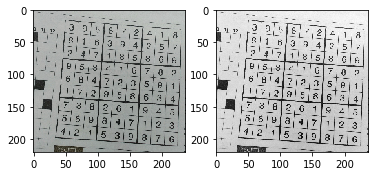

In [3]:
#Pre-processing
dirpath = "./test_imgs/";
img = cv.imread(join(dirpath, "sudoku1.jpg"));

#Resize image
img = cv.resize(img, (0,0), fx=0.1, fy=0.1) 
rows,cols,ch = img.shape

#Convert to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY);

plt.subplot(121); plt.imshow(img);
plt.subplot(122); plt.imshow(img_gray, 'gray')
plt.show()

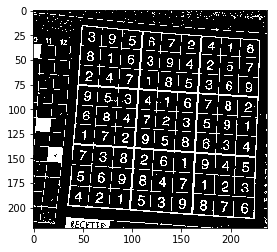

In [4]:
#Adaptive Thresholding
bw = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 21, 4);
bw = ~bw
plt.imshow(bw, 'gray')
plt.show()

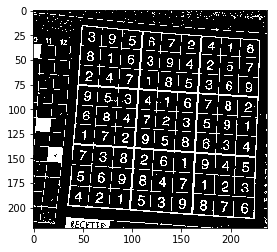

In [5]:
#Noise Removal (Morphological Opening)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(1,1));
opened = cv.morphologyEx(bw, cv.MORPH_OPEN, kernel);
plt.imshow(opened, 'gray')
plt.show()

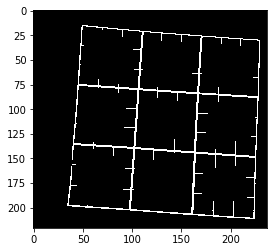

In [6]:
#Largest Connected Component
def undesired_objects (image):
    image = image.astype('uint8')
    nb_components, output, stats, centroids = cv.connectedComponentsWithStats(image, connectivity=8)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

    img2 = np.zeros(output.shape)
    img2[output == max_label] = 255
    plt.imshow(img2, 'gray')
    plt.show()
    return img2

outer_grid = undesired_objects(opened)

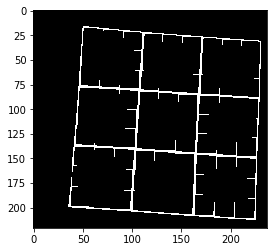

In [7]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(10,10));
closed_grid = cv.morphologyEx(outer_grid, cv.MORPH_CLOSE, kernel);
plt.imshow(closed_grid, 'gray')
plt.show()

In [37]:
#Hough Transform
print(closed_grid.shape)
# edges = cv2.Canny(gray,50,150,apertureSize = 3)
# closed_grid.dtype = np.float32

lines = cv.HoughLines(closed_grid, 1, np.pi/180, 200)
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(closed_grid,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(closed_grid, 'gray')
plt.show()

(221, 237)


error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/hough.cpp:86: error: (-215) img.type() == CV_8UC1 in function HoughLinesStandard


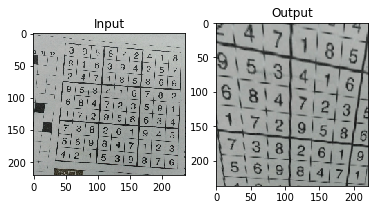

In [22]:
#Unwarping the image
pts2 = np.float32([[0,0], [rows,0], [0,cols], [rows,cols]])

geo_matrix = cv.getPerspectiveTransform(pts1,pts2)

dst = cv.warpPerspective(img, geo_matrix, (rows,cols))


plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [ ]:
#Divide it into blocks


In [8]:
#Train NN on MNIST
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 17s 2us/step
Epoch 1/5
60000/60000 [==============================] - 13s 219us/step - loss: 0.2002 - acc: 0.9399
Epoch 2/5
60000/60000 [==============================] - 14s 226us/step - loss: 0.0783 - acc: 0.9762
Epoch 3/5
60000/60000 [==============================] - 13s 216us/step - loss: 0.0505 - acc: 0.9842
Epoch 4/5
60000/60000 [==============================] - 13s 221us/step - loss: 0.0367 - acc: 0.9881
Epoch 5/5
10000/10000 [==============================] - 1s 89us/step


[0.06933424481686089, 0.9792]

In [ ]:
#Extracting the digits

In [ ]:
#Solving the sudoku
def solve_sudoku():
    
    return solution

In [ ]:
#Overlaying
